In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
def load_datasets(filename):
    '''
    Читає вхідний файл
    
    Параметри:
    filename - шлях до вхідного файлу з даними
    
    Результат:
    X - набір характеристик
    y - набір передбачуваних величин
    '''
    
    df = pd.read_csv(filename, delimiter=',')
    X, y = df["A"], df["B"]
    return X, y

In [50]:
def split_datasets(X, y, test_size = 0.2):
    '''
    Розбиває дані на 2 датасети: тренувальний та тестувальний.
    
    Параметри:
    X - набір характеристик
    y - набір передбачуваних величин
    test_size - розмір тестового датасету
    
    Результат:
    X_train - набір тренувальних прикладів
    X_test - набір тестових прикладів
    y_train - вектор величин, що передбачаємо для тренувального датасету
    y_test - вектор величин, що передбачаємо для тестового датасету
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [51]:
def plot_data(X_train, X_test, y_train, y_test):
    '''
    Функція для відображення розподілу тренувальних та тестових даних (для однієї змінної)
    '''
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [52]:
def normalize(X):
    '''
    Нормалізує датасет з характеристиками
    
    Параметри:
    X - набір характеристик
    
    Результат:
    X - набір нормалізованих характеристик
    mean - вектор середніх значень характеристик
    std - вектор стандартних девіацій характеристик
    '''
    ##################
    # Заповнити змінні
    ##################
    X_new=[]
    mean = np.mean(X)
    std = np.std(X)
    for i in X:
        X_new.append((i-mean)/std)
    
    print(X_new)
    return X_new, mean, std

In [53]:
def prepare_X(X):
    '''
    Формує датасет з рисами, де першою колонкою буде колонка з одиницями.
    
    Параметри:
    X - вхідний датасет з прикладами, по одному в рядок. Кожна риса - відповідна колонка.
    
    Результат:
    X_new - датасет, який складається з колонки одиниць, а решта колонок з X    
    '''
    m = np.array(X).shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [54]:
def hypothesis(X, theta):
    '''
    Обчислює значення передбачуваної величини для вхідної матриці X та вектора параметрів thetha.
    
    Параметри:
    X - матриця з рисами. Перша колонка - одиниці. Друга - дані риси.
    thetha - вектор параметрів: [thetha0, thetha1]
    
    Результат:
    Матриця значень шуканої величини для прикладів з X
    '''
    ######################
    h_thetha=[]
    # Один рядок коду
    for i in X:
        h_thetha.append(theta[0]+theta[1]*i[1])
    ######################
    return h_thetha

In [55]:
def cost_function(X, y, theta):
    '''
    Функція для обчислення штрафної функції J.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thethe - вектор параметрів регресії
    
    Результат:
    Дійсне число - значення штрафної функції для набору прикладів X та параметрів thetha
    '''
    m = X.shape[0]
    if m == 0:
        return None
    ######################
    # 1-2 рядки коду
    H=hypothesis(X,theta)
    J=0
    for i in range(len(H)):
        J=J+(H[i]-y.values[i])**2
    ######################
    return J/(2*len(H))

In [56]:
def derivative(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    '''
    Функція для обчислення похідних штрафної функції J по thetha.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор параметрів регресії
    
    Результат:
    Вектор похідних d_thetha
    '''
    ######################
    # 1 рядок коду
#     CF=hypothesis(X,theta)
#     d_thetha=0
#     arr=[]
#     if temp:
#         for i in X:
#             arr.append(i[1])
#     else:
#         arr=np.ones(len(X))
        
#     for i in range(len(X)):
#         d_thetha+=((CF[i]-y[i])*arr[i])
    d_thetha = np.dot(hypothesis(X, theta) - y.values, X)/m

    ######################
    return d_thetha/(len(y))

In [57]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    '''
    Функція, що реалізує градієнтний спуск для метода лінійної регресії.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор початкових параметрів регресії
    alpha - швидкість навчання
    num_iters - кількість ітерацій
    print_J - виведення штрафної функції на екран після кожної ітерації
    
    Результат:
    theta - оптимальні значення параметрів регресії
    J_history - масив історичних значень штрафної функції після кожної ітерації
    '''
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        ######################
        # Використати написані вище функції
#         delta = [derivative(X, y, theta,0),derivative(X, y, theta,1)]
#         print('D - ',delta)
# #         
#         theta = [theta[0]-alpha*delta[0],theta[1]-alpha*delta[1]]
#         J = cost_function(X, y, theta)

        delta = derivative(X, y, theta)
        theta = theta - alpha*delta
        J = cost_function(X, y, theta)
        ######################
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [58]:
def plot_J(X, y):
    '''
    Функція для виведення графіків штрафної функції для різних значень параметрів на вхідних даних
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    '''
    theta_0 = np.linspace(-10, 10, 100)
    theta_1 = np.linspace(-1, 4, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

## Основний код програми

Отримання датасетів та видрук їх параметрів.

In [59]:
X, y = load_datasets('burrito.csv')
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97,), y=(97,)


Розбиття датасету на частини:

In [60]:
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77,), y=(77,)
Test set: X=(20,), y=(20,)


Відображення тренувальних і тестових даних на графіку (для 1 змінної)

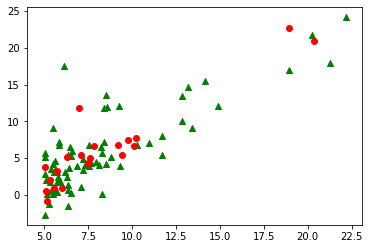

In [61]:
plot_data(X_train, X_test, y_train, y_test)

Підготовка тренувальних даних (додавання 0-колонки з одиницями). Ініціалізація параметрів регресії (0, 0): 

In [62]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0])

[-0.4557765226429768, 0.03452475324713187, -0.2283087079510588, -0.4572324437192082, -0.2614242946122471, 1.2566778472202678, -0.6033539771882395, -0.4220785675512962, -0.1975225950118408, 3.7383614998872425, -0.5216370978732214, -0.796912066450116, -0.6857591101029307, -0.03898602545640086, -0.6458933439064884, -0.22627041844433504, 0.08675261294539262, 3.2266714198226807, -0.5491407705678454, -0.6998418376039316, -0.6211956281951466, 0.9580816701313776, -0.1430711467607907, -0.6777383085375108, -0.8083741360139004, -0.17385725970000868, 0.761399968378678, -0.4142165937396472, -0.5850093716277253, -0.7997709660179882, -0.8058328919535694, -0.46268552993200174, -0.7656229989572908, -0.3947601939027381, 0.1159239770546084, -0.5794239289534562, 0.13167439597020142, -0.45405588864379437, 2.879632777833731, 0.3254707268627341, -0.6659585834661852, 0.05676063877502786, -0.11755282098830042, -0.6549994684560076, 1.3487979444072657, 1.6103343122829965, -0.40574578020521057, 0.960199373514987,

Для спрощення записів аліас для вектора передбачуваних значень

In [63]:
y = y_train[:]


У випадку використання ВСІХ даних для тренування (test_size=0.0), штрафна функція має повернути величину близьку до 32.072.

In [64]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))


X: (77, 2)
y: (77,)
30.609921280564294


Налаштування гіперпараметрів регресії: швидкості навчання та кількості ітерацій.

In [65]:
alpha = 0.01
num_iters = 1500

Запуск градієнтного спуску та видрук знайдених оптимальних значень на екран. У випадку використання всіх даних для тренування, результати будуть близькі до Theta 0: -3.63; Theta 1: 1.17

In [69]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))

Theta 0: 1.0097410896683805; Theta 1: 0.7676400038986329


Відображення штрафної функції як функції від thetha0, thetha1.

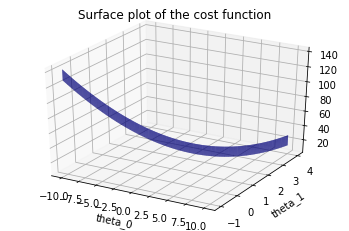

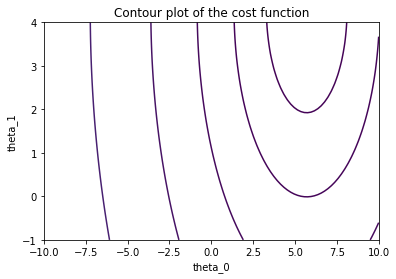

In [67]:
plot_J(X, y)

Відображення знайденої апроксимації разом із тренувальними даними.

[1.00974109 0.76764   ]


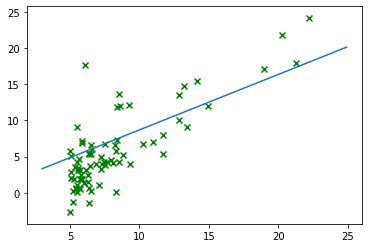

In [68]:
x = np.arange(3, 25, 0.1)
print(new_theta)

h = new_theta[0] + new_theta[1]*x
plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

Оцінка похибки апроксимації на тестових даних (test_size має бути більше 0.0 та менше 1.0).

In [71]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
####################
X_test_norm = (X_test - mean)/std
X_test_proc = prepare_X(X_test_norm)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({'X' : X_test, 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

          X  y_actual    y_pred         err
23   6.3261   5.18750  0.653204   87.408121
69  20.3410  20.99200  3.501091   83.321786
19   7.0708   5.38930  0.804530   85.071718
25  18.9450  22.63800  3.217418   85.787536
3    7.0032  11.85400  0.790793   93.328891
44   7.8247   6.73180  0.957726   85.773113
53   7.6031   4.99810  0.912696   81.739151
87   6.0020   0.92695  0.587345   36.636797
61   5.1793  -0.74279  0.420169  156.566336
9    5.0546   3.81660  0.394830   89.654941
83   9.7687   7.54350  1.352755   82.067282
67  10.2360   7.77540  1.447712   81.380869
93   5.3054   1.98690  0.445793   77.563383
59   9.4536   5.41410  1.288725   76.196876
70  10.1360   6.67990  1.427391   78.631544
6    7.4764   4.34830  0.886950   79.602384
10   5.7107   3.25220  0.528152   83.760168
49   5.5416   1.01790  0.493790   51.489343
86   9.1802   6.79810  1.233169   81.860095
17   5.1301   0.56077  0.410171   26.855673
27.157174386259623
